# Practical Application Lesson \#9

### Noah Miller

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

I will first find the mean tip by sex and then build a histogram to show tip amounts by sex.

In [2]:
tips = Table.read_table('tips.csv')
print(tips)
female_tips = tips.where('sex', 'Female').select('tip', 'sex')
male_tips = tips.where('sex', 'Male').select('tip', 'sex')
mean_female_tip = sum(female_tips.column('tip'))/len(female_tips.column('tip'))
mean_male_tip = sum(male_tips.column('tip'))/len(male_tips.column('tip'))
print('The mean female tip was $' + str(mean_female_tip)[0:4] + ' and the mean male tip was $' + str(mean_male_tip)[0:4])

total_bill | tip  | sex    | smoker | day  | time   | size
16.99      | 1.01 | Female | No     | Sun  | Dinner | 2
10.34      | 1.66 | Male   | No     | Sun  | Dinner | 3
21.01      | 3.5  | Male   | No     | Sun  | Dinner | 3
23.68      | 3.31 | Male   | No     | Sun  | Dinner | 2
24.59      | 3.61 | Female | No     | Sun  | Dinner | 4
25.29      | 4.71 | Male   | No     | Sun  | Dinner | 4
8.77       | 2    | Male   | No     | Sun  | Dinner | 2
26.88      | 3.12 | Male   | No     | Sun  | Dinner | 4
15.04      | 1.96 | Male   | No     | Sun  | Dinner | 2
14.78      | 3.23 | Male   | No     | Sun  | Dinner | 2
... (234 rows omitted)
The mean female tip was $2.83 and the mean male tip was $3.08


C:\Users\C20Noah.Miller\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


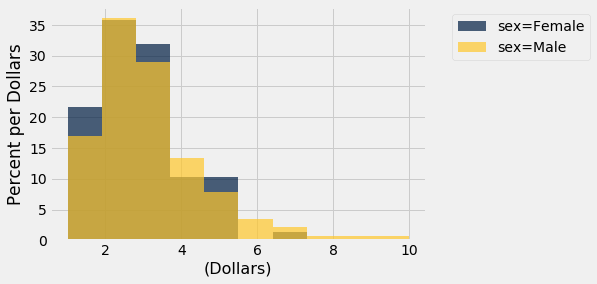

In [6]:
tips.hist('tip', unit = 'Dollars', group = 'sex')

I will now do the same, but for time.

In [6]:
mean_lunch_tip = sum(tips.where('time', 'Lunch').column('tip'))/len(tips.where('time', 'Lunch').column('tip'))
mean_dinner_tip = sum(tips.where('time', 'Dinner').column('tip'))/len(tips.where('time', 'Dinner').column('tip'))
print('The mean lunch tip was $' + str(mean_lunch_tip)[0:4] + ' the mean dinner tip was $' + str(mean_dinner_tip)[0:4])

The mean lunch tip was $2.72 the mean dinner tip was $3.10


C:\Users\C20Noah.Miller\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


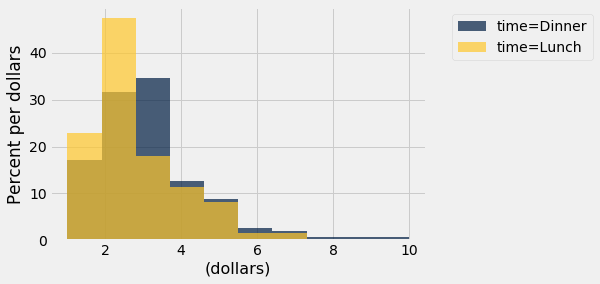

In [7]:
tips.hist('tip', unit = 'dollars', group = 'time')

I will now create a function that turns weekdays into numbers. I will then add a column to the tips table labled as weekday_num to represent this.

In [8]:
def weekday_to_num(weekday):
    if weekday == "Mon":
        return 1
    if weekday == "Tues":
        return 2
    if weekday == "Wed":
        return 3
    if weekday == "Thurs":
        return 4
    if weekday == "Fri":
        return 5
    if weekday == "Sat":
        return 6
    else:
        return 7

In [10]:
weekday_num = tips.apply(weekday_to_num, 'day')
tips.with_column('weekday_num', weekday_num)

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


Now I will create a function to estimate the tip given for any given total bill amount based on the dataset given.

In [11]:
def est_tip(bill_amount):
    tip_range = tips.where('total_bill', are.between(bill_amount - 1, bill_amount + 1)).column('tip')
    expected_tip = sum(tip_range)/len(tip_range)
    return expected_tip

Now I will use this function on the whole dataset to estimae the tip for each total bill. After this I will plot a scatter plot with both the actual tip and the estimated tip to see how closely the relate.

In [15]:
estimated_tip = tips.apply(est_tip, 'total_bill')
tips = tips.with_column('estimated_tip', estimated_tip).select('total_bill', 'tip', 'estimated_tip')
tips

total_bill,tip,estimated_tip
16.99,1.01,2.82437
10.34,1.66,1.81136
21.01,3.5,3.3425
23.68,3.31,3.33867
24.59,3.61,3.56267
25.29,4.71,4.19909
8.77,2,1.865
26.88,3.12,3.48111
15.04,1.96,2.426
14.78,3.23,2.43833


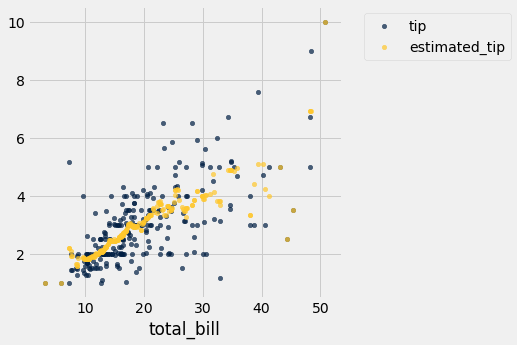

In [17]:
tips.scatter('total_bill')